In [43]:
import pandas as pd

# int64s
s_int = pd.Series([1, 2, 3, 4, 5], index = ['a', 'b', 'c', 'd', 'e'])
# print(s_int)

# objects
s_obj = pd.Series([1, 2, 'k', 4, 5], index = ['a', 'b', 'c', 'd', 'e'])
# print(s_obj)

# get dtype directly
# print("s_obj type:", s_obj.dtype)
# print("s_int type:", s_int.dtype)

# convert dictionary into Series
data = {
    'b' : 1,
    'a' : 0,
    'c' : 2
}
dataDF = pd.Series(data)
# print(dataDF)

dataDF = pd.Series(data, index = ['a', 'b', 'c', 'd'])
# print(dataDF)

# convert scalar into Series
scalarDF = pd.Series(42, index = ['a', 'b', 'c', 'd', 'e'])
# print(scalarDF)

In [44]:
# Slicing by Indices
# print(s_int[0]) # first column
# print(s_int[-1]) # last column
# print(s_int[:3])
# print(s_int[[4, 3, 1]])
# print(s_int[s_int > s_int.median()])


# Slicing by Labels
print(s_int['a'])
print(s_int['e'])
print('e' in s_int)
print('f' in s_int)
# print(s_int['f']) # KeyError
print(s_int.get('f'))
print(s_int.get('b'))

1
5
True
False
None
2


In [50]:
# Vectorized Operations
# print(s_int + s_int)
# print(2 * s_int)

first = s_int[1:]
second = s_int[:-1]
print(first + second)

# Name your dataset
named_series = pd.Series(data, name = "My Awesome Data")
print(named_series)
print(named_series.name)

a    NaN
b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64
b    1
a    0
c    2
Name: My Awesome Data, dtype: int64
My Awesome Data


In [56]:
# Dataframes 

one = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
two = pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])

d = {
    'one' : one,
    'two' : two
}

df = pd.DataFrame(d)
# print(df)

df_filter_row = pd.DataFrame(d, index = ['d', 'b', 'a'])
# print(df_filter_row)

df_rows_and_cols = pd.DataFrame(d, index = ['d', 'a'], columns = ['two', 'three'])
# print(df_rows_and_cols)

print(df.index)
print(df.columns)

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['one', 'two'], dtype='object')


In [67]:
d = {
    'one' : [1, 2, 3, 4],
    'two' : [4, 3, 2, 1]
}

# print(pd.DataFrame(d))

d = [
    {'a':1, 'b':2},
    {'a':5, 'b':10, 'c':20}
]

# print(pd.DataFrame(d))

# multi-indexed frame

d = pd.DataFrame({
    ('a', 'b') : {('A', 'B') : 1, ('A', 'C') : 2},
    ('a', 'a') : {('A', 'C') : 3, ('A', 'B') : 4},
    ('a', 'c') : {('A', 'B') : 5, ('A', 'C') : 6},
    ('b', 'a') : {('A', 'C') : 7, ('A', 'B') : 8},
    ('b', 'b') : {('A', 'D') : 9, ('A', 'B') : 10}
})
# print(d)

df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ['B', [4, 5, 6]]]))
print(df)

df_transposed = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]), orient = 'index')
print(df_transposed)

   A  B
0  1  4
1  2  5
2  3  6
   0  1  2
A  1  2  3
B  4  5  6


In [80]:
df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]), orient = 'index', columns = ['one', 'two', 'three'])
print(df)
print()

# print(df['one'])
df['three'] = df['one'] + df['two']
# print(df)

df['flag'] = df['one'] > 2
# print(df)

del df['two']
df.pop('three')
# print(df)

df.insert(1, 'midcolumn', df['one'] + 3)
print(df)

   one  two  three
A    1    2      3
B    4    5      6

   one  midcolumn   flag
A    1          4  False
B    4          7   True


In [86]:
# print(df.loc['B'])
print(df.iloc[0:1])

print(df.T)

   one  midcolumn   flag
A    1          4  False
               A     B
one            1     4
midcolumn      4     7
flag       False  True


(85, 10)
(119, 10)


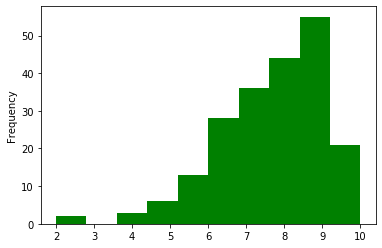

In [117]:
reviews = pd.read_csv('ign.csv')

reviews = reviews.iloc[:,1:]

reviews.head()
reviews.tail()
# print(reviews.shape)

# print("Average of 'Score' Column:", reviews['score'].mean())
# print(reviews.mean())
# print('\n')
# print(reviews.min())
# print('\n')
# print(reviews.max())
# print('\n')
# print(reviews.median())
# print(reviews.corr())

score_filter = reviews['score'] > 7
filtered_reviews = reviews[score_filter]
# print(filtered_reviews.shape)

good_xb1_filter = (reviews['score'] > 8) & (reviews['platform'] == 'Xbox One')
filtered_reviews = reviews[good_xb1_filter]
print(filtered_reviews.shape)

good_ps4_filter = (reviews['score'] > 8) & (reviews['platform'] == 'PlayStation 4')
filtered_reviews = reviews[good_ps4_filter]
print(filtered_reviews.shape)

reviews[reviews['platform'] == "Xbox One"]["score"].plot(kind="hist", color="green")

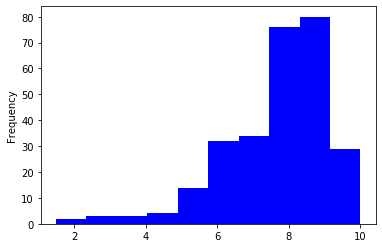

In [116]:
reviews[reviews['platform'] == "PlayStation 4"]["score"].plot(kind="hist", color="blue")